In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# scores = cross_val_score(model, X, y, cv=10) 

In [2]:
SDB = sqlite3.connect('aruodas.db')
C = SDB.cursor()
sql="""select *   from Aruodas;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

df.head()

,miestas,rajonas,gatve,kaina,kv_kaina,nuoroda,Namo numeris:,Buto numeris:,Unikalus daikto numeris (RC numeris):,Plotas:,...,Metai:,Pastato tipas:,Šildymas:,Įrengimas:,Pastato energijos suvartojimo klasė:,Ypatybės:,Papildomos patalpos:,Papildoma įranga:,Apsauga:,Objektas:
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,5A,55,1097-1012-6150,"66,64 m²",...,2003,Mūrinis,Centrinis,Įrengtas,A,Tualetas ir vonia atskirai\nInternetas\nVirtuv...,Balkonas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Kodinė laiptinės spyna,None
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,https://www.aruodas.lt/butai-palangoje-sventoj...,14,11,None,"49,36 m²",...,2020,Mūrinis,Aeroterminis,Įrengtas,None,None,None,None,None,None
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,https://www.aruodas.lt/butai-palangoje-palango...,None,None,None,35 m²,...,2023,Kita,Centrinis kolektorinis,Įrengtas,B,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,9A,None,None,98 m²,...,2008,Mūrinis,Centrinis,Įrengtas,A+,Atskiras įėjimas\nAukštos lubos\nNauja kanaliz...,Sandėliukas\nBalkonas\nTerasa\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,https://www.aruodas.lt/butai-vilniuje-fabijoni...,83,None,None,50 m²,...,2005,Mūrinis,Centrinis kolektorinis,Įrengtas,None,Yra liftas,None,None,None,None


In [3]:
df = pd.read_csv('../../../eismas/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
l = LabelEncoder().fit_transform(df['sex'])
df['lytis'] = l
df.head()

,age,sex,bmi,children,smoker,region,charges,lytis
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [6]:
le = LabelEncoder()
l = le.fit_transform(df['sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:

# b) iš autoplius duomenų, pasirinkti 7-8 parametrus ir parašyti skriptą automobilio vertės nustatymui.
# Įvertinkite tikslumaą su score parametru

In [7]:
# a) Parašyti kainos prognozės skriptą, kuris prognozuotų būsto kainą. Naudoti Liearregression
# kategorines vertes užkoduoti su LabelEncoder'iu

SDB = sqlite3.connect('aruodas.db')
C = SDB.cursor()
sql="""select *   from Aruodas;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()


In [8]:

def plotas(x):
    # if 'm²' in x:
    if x is not None:
        return float(x.replace(' m²', '',).replace(',', '.'))
    else:
        return np.nan
    
df['plotas'] = df['Plotas:'].apply(plotas)

def amzius(x):
    return  2024 - int(x[:4])

df['amzius'] = df['Metai:'].apply(amzius)

df.head()

,miestas,rajonas,gatve,kaina,kv_kaina,nuoroda,Namo numeris:,Buto numeris:,Unikalus daikto numeris (RC numeris):,Plotas:,...,Šildymas:,Įrengimas:,Pastato energijos suvartojimo klasė:,Ypatybės:,Papildomos patalpos:,Papildoma įranga:,Apsauga:,Objektas:,plotas,amzius
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,5A,55,1097-1012-6150,"66,64 m²",...,Centrinis,Įrengtas,A,Tualetas ir vonia atskirai\nInternetas\nVirtuv...,Balkonas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Kodinė laiptinės spyna,None,66.64,21
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,https://www.aruodas.lt/butai-palangoje-sventoj...,14,11,None,"49,36 m²",...,Aeroterminis,Įrengtas,None,None,None,None,None,None,49.36,4
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,https://www.aruodas.lt/butai-palangoje-palango...,None,None,None,35 m²,...,Centrinis kolektorinis,Įrengtas,B,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None,35.00,1
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,9A,None,None,98 m²,...,Centrinis,Įrengtas,A+,Atskiras įėjimas\nAukštos lubos\nNauja kanaliz...,Sandėliukas\nBalkonas\nTerasa\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None,98.00,16
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,https://www.aruodas.lt/butai-vilniuje-fabijoni...,83,None,None,50 m²,...,Centrinis kolektorinis,Įrengtas,None,Yra liftas,None,None,None,None,50.00,19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8390 entries, 0 to 8389
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   miestas                                8390 non-null   object 
 1   rajonas                                7129 non-null   object 
 2   gatve                                  8390 non-null   object 
 3   kaina                                  8390 non-null   int64  
 4   kv_kaina                               8389 non-null   float64
 5   nuoroda                                8390 non-null   object 
 6   Namo numeris:                          5831 non-null   object 
 7   Buto numeris:                          889 non-null    object 
 8   Unikalus daikto numeris (RC numeris):  275 non-null    object 
 9   Plotas:                                8389 non-null   object 
 10  Kambarių sk.:                          8390 non-null   object 
 11  Aukš

In [9]:

aruodas = df[['miestas', 'rajonas', 'gatve', 'kaina', 'kv_kaina', 'Kambarių sk.:',
       'Aukštas:', 'Aukštų sk.:', 'Pastato tipas:', 'Šildymas:',
       'Įrengimas:','plotas', 'amzius']]
aruodas.dropna(inplace=True)

aruodas['Kambarių sk.:'] = aruodas['Kambarių sk.:'].apply(lambda x: int(x))
aruodas['Aukštas:'] = aruodas['Aukštas:'].apply(lambda x: int(x))
aruodas['Aukštų sk.:'] = aruodas['Aukštų sk.:'].apply(lambda x: int(x))
aruodas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, 0 to 8389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   miestas         7128 non-null   object 
 1   rajonas         7128 non-null   object 
 2   gatve           7128 non-null   object 
 3   kaina           7128 non-null   int64  
 4   kv_kaina        7128 non-null   float64
 5   Kambarių sk.:   7128 non-null   int64  
 6   Aukštas:        7128 non-null   int64  
 7   Aukštų sk.:     7128 non-null   int64  
 8   Pastato tipas:  7128 non-null   object 
 9   Šildymas:       7128 non-null   object 
 10  Įrengimas:      7128 non-null   object 
 11  plotas          7128 non-null   float64
 12  amzius          7128 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 779.6+ KB


In [ ]:
aruodas.head()

,miestas,rajonas,gatve,kaina,kv_kaina,Kambarių sk.:,Aukštas:,Aukštų sk.:,Pastato tipas:,Šildymas:,Įrengimas:,plotas,amzius
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,2,3,5,Mūrinis,Centrinis,Įrengtas,66.64,21
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,2,1,2,Mūrinis,Aeroterminis,Įrengtas,49.36,4
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,2,1,3,Kita,Centrinis kolektorinis,Įrengtas,35.00,1
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,3,2,5,Mūrinis,Centrinis,Įrengtas,98.00,16
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,2,12,12,Mūrinis,Centrinis kolektorinis,Įrengtas,50.00,19


In [10]:
# l = LabelEncoder().fit_transform(aruodas['Šildymas:'])
# aruodas['Šildymas:'] = l

label_encoder = LabelEncoder()
data = aruodas['Šildymas:']
encoded_data = label_encoder.fit_transform(data)
print('Category Mapping:', dict(zip(data, encoded_data)))
aruodas.head()

Category Mapping: {'Centrinis': np.int64(6), 'Aeroterminis': np.int64(0), 'Centrinis kolektorinis': np.int64(7), 'Centrinis kolektorinis, aeroterminis': np.int64(8), 'Dujinis, elektra': np.int64(38), 'Elektra': np.int64(42), 'Elektra, centrinis kolektorinis': np.int64(45), 'Centrinis kolektorinis, aeroterminis, saulės energija': np.int64(9), 'Elektra, aeroterminis': np.int64(43), 'Dujinis': np.int64(37), 'Geoterminis': np.int64(59), 'Centrinis, elektra': np.int64(24), 'Centrinis, centrinis kolektorinis': np.int64(19), 'Dujinis, kietu kuru': np.int64(40), 'Saulės energija': np.int64(68), 'Kietu kuru': np.int64(64), 'Centrinis kolektorinis, saulės energija': np.int64(17), 'Elektra, dujinis': np.int64(48), 'Centrinis, dujinis': np.int64(22), 'Elektra, kietu kuru': np.int64(54), 'Elektra, kita': np.int64(57), 'Elektra, dujinis, kietu kuru': np.int64(49), 'Centrinis, elektra, centrinis kolektorinis': np.int64(26), 'Aeroterminis, kietu kuru': np.int64(3), 'Centrinis kolektorinis, kita': np.i

,miestas,rajonas,gatve,kaina,kv_kaina,Kambarių sk.:,Aukštas:,Aukštų sk.:,Pastato tipas:,Šildymas:,Įrengimas:,plotas,amzius
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,2,3,5,Mūrinis,Centrinis,Įrengtas,66.64,21
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,2,1,2,Mūrinis,Aeroterminis,Įrengtas,49.36,4
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,2,1,3,Kita,Centrinis kolektorinis,Įrengtas,35.00,1
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,3,2,5,Mūrinis,Centrinis,Įrengtas,98.00,16
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,2,12,12,Mūrinis,Centrinis kolektorinis,Įrengtas,50.00,19


In [11]:


l = LabelEncoder().fit_transform(aruodas['miestas'])
aruodas['miestas'] = l
l = LabelEncoder().fit_transform(aruodas['rajonas'])
aruodas['rajonas'] = l
l = LabelEncoder().fit_transform(aruodas['gatve'])
aruodas['gatve'] = l
l = LabelEncoder().fit_transform(aruodas['Pastato tipas:'])
aruodas['Pastato tipas:'] = l
l = LabelEncoder().fit_transform(aruodas['Šildymas:'])
aruodas['Šildymas:'] = l
l = LabelEncoder().fit_transform(aruodas['Įrengimas:'])
aruodas['Įrengimas:'] = l
aruodas.head()



,miestas,rajonas,gatve,kaina,kv_kaina,Kambarių sk.:,Aukštas:,Aukštų sk.:,Pastato tipas:,Šildymas:,Įrengimas:,plotas,amzius
0,47,416,1018,205000,3076.0,2,3,5,5,6,4,66.64,21
1,28,418,730,250000,5065.0,2,1,2,5,0,4,49.36,4
2,28,250,12,268000,7657.0,2,1,3,2,7,4,35.00,1
3,47,416,7,615000,6276.0,3,2,5,5,6,4,98.00,16
4,47,73,1069,131000,2620.0,2,12,12,5,7,4,50.00,19


fit score: 48.81027082680627


<Axes: >

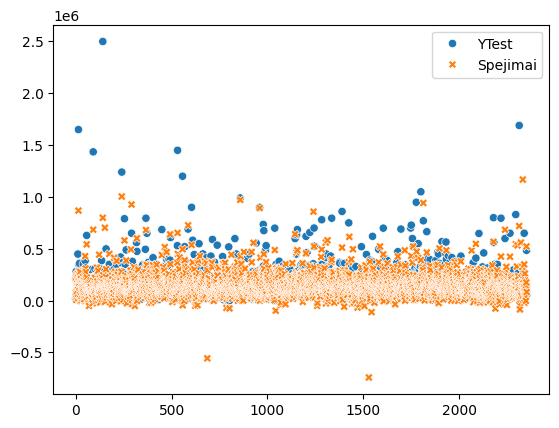

In [12]:
X = aruodas.drop(columns=['kaina', 'kv_kaina'])
y = aruodas['kaina'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)

spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
# res.head()
fit_score = fit.score(X_test, y_test) * 100.0
print(f'fit score: {fit_score}')
sns.scatterplot(data=res)

fit score: 14.878988511383639


<Axes: >

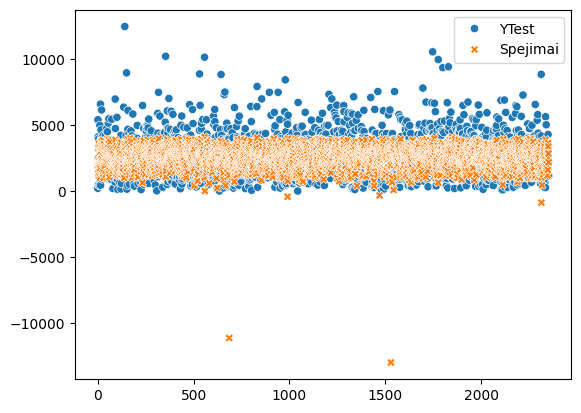

In [13]:
# kvadrato kaina
X = aruodas.drop(columns=['kaina', 'kv_kaina'])
y = aruodas['kv_kaina'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)

spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
# res.head()
fit_score = fit.score(X_test, y_test) * 100.0
print(f'fit score: {fit_score}')
sns.scatterplot(data=res)

In [41]:
miestas = 1
rajonas = 1
gatve = 1
Kambariu_sk = 1
aukstas = 1
Aukstu_s = 1
Pastato_tipas = 1
sildymas = 1
irengimas = 1
plotas = 50
amzius = 1

miestas
rajonas
gatve
kaina
kv_kaina
Kambarių sk.:
Aukštas:
Aukštų sk.:
Pastato tipas:
Šildymas:
Įrengimas:
plotas
amzius


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



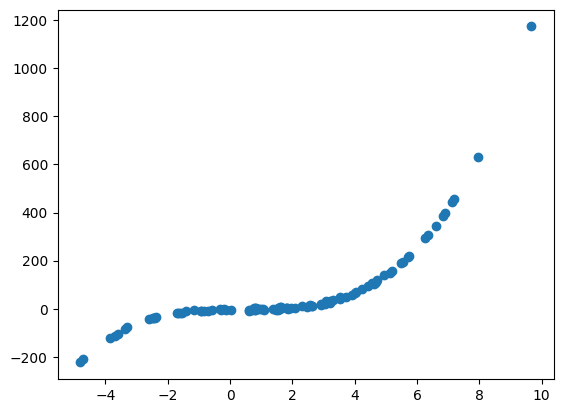

In [15]:
np.random.seed(0)
x = 2-3*np.random.normal(0,1,100)
y = x-2*(x**2)+1.5*(x**3)+np.random.normal(-3,3,100)
x = x[:, np.newaxis]

plt.scatter(x, y)
plt.show()

In [16]:
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)


In [17]:
# modelio kurimas
model = LinearRegression()
model.fit(x_poly, y)


LinearRegression()

In [18]:
y_poly_predicted = model.predict(x_poly)

In [19]:
rmse = np.sqrt(mean_squared_error(y, y_poly_predicted))
r = model.score(x_poly, y)
print('rsme', rmse, 'r2', r, sep='\t')

rsme	3.072743608208423	r2	0.9996788340617946


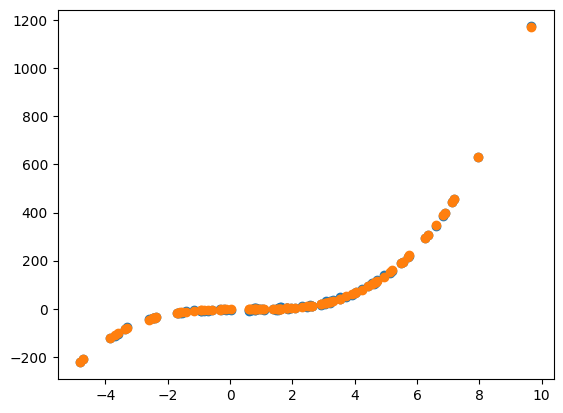

In [20]:
plt.scatter(x, y)
plt.scatter(x, y_poly_predicted)
plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# split the train and test dataset
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


<Axes: >

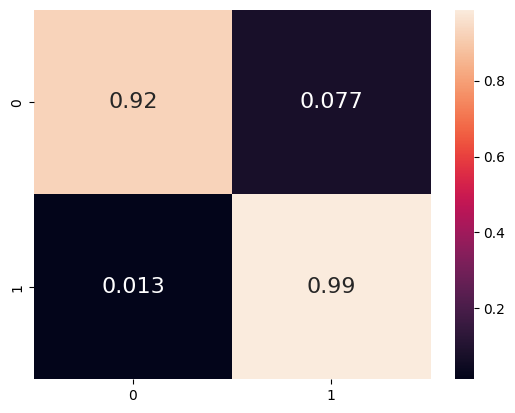

In [22]:
from sklearn.metrics import confusion_matrix
# import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
#ax.collections[0].colorbar.ax.tick_params(labelsize=fontsize) #uncomment to change colorbar labelsize

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import kagglehub
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
print("Path to dataset files:", path)
df = pd.read_csv(path+"/loan_data.csv")
df.head()
# UŽDUOTIS
# Pritaikyti logistinę regresiją ir nustatyti - duos/ne paskolą?

Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [16]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [24]:
# Convert categorical columns to numerical values using LabelEncoder
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file' ]

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Check the data after encoding
# df.head()

# Define features (X) and target (y)
# X = df.drop('loan_status', axis=1)  # Features
X = df.drop(columns=['loan_status','previous_loan_defaults_on_file'])  # Features
y = df['loan_status']  # Target (Loan approval: Y/N)

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Logistic Regression model
# logreg = LogisticRegression()

# # Train the model
# logreg.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = logreg.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Display the evaluation results
# print(f'Accuracy: {accuracy * 100:.2f}%')
# print('Confusion Matrix:')
# print(conf_matrix)
# print('Classification Report:')
# print(class_report)

Logistic Regression model accuracy (in %): 81.89999999999999


<Axes: >

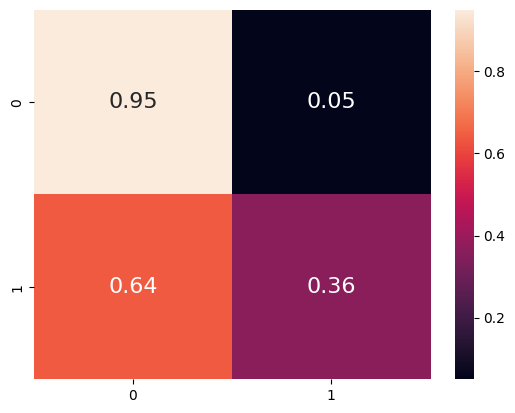

In [25]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})